In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
df = pd.read_csv('heart.csv')

In [88]:
df.shape

(303, 14)

In [89]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

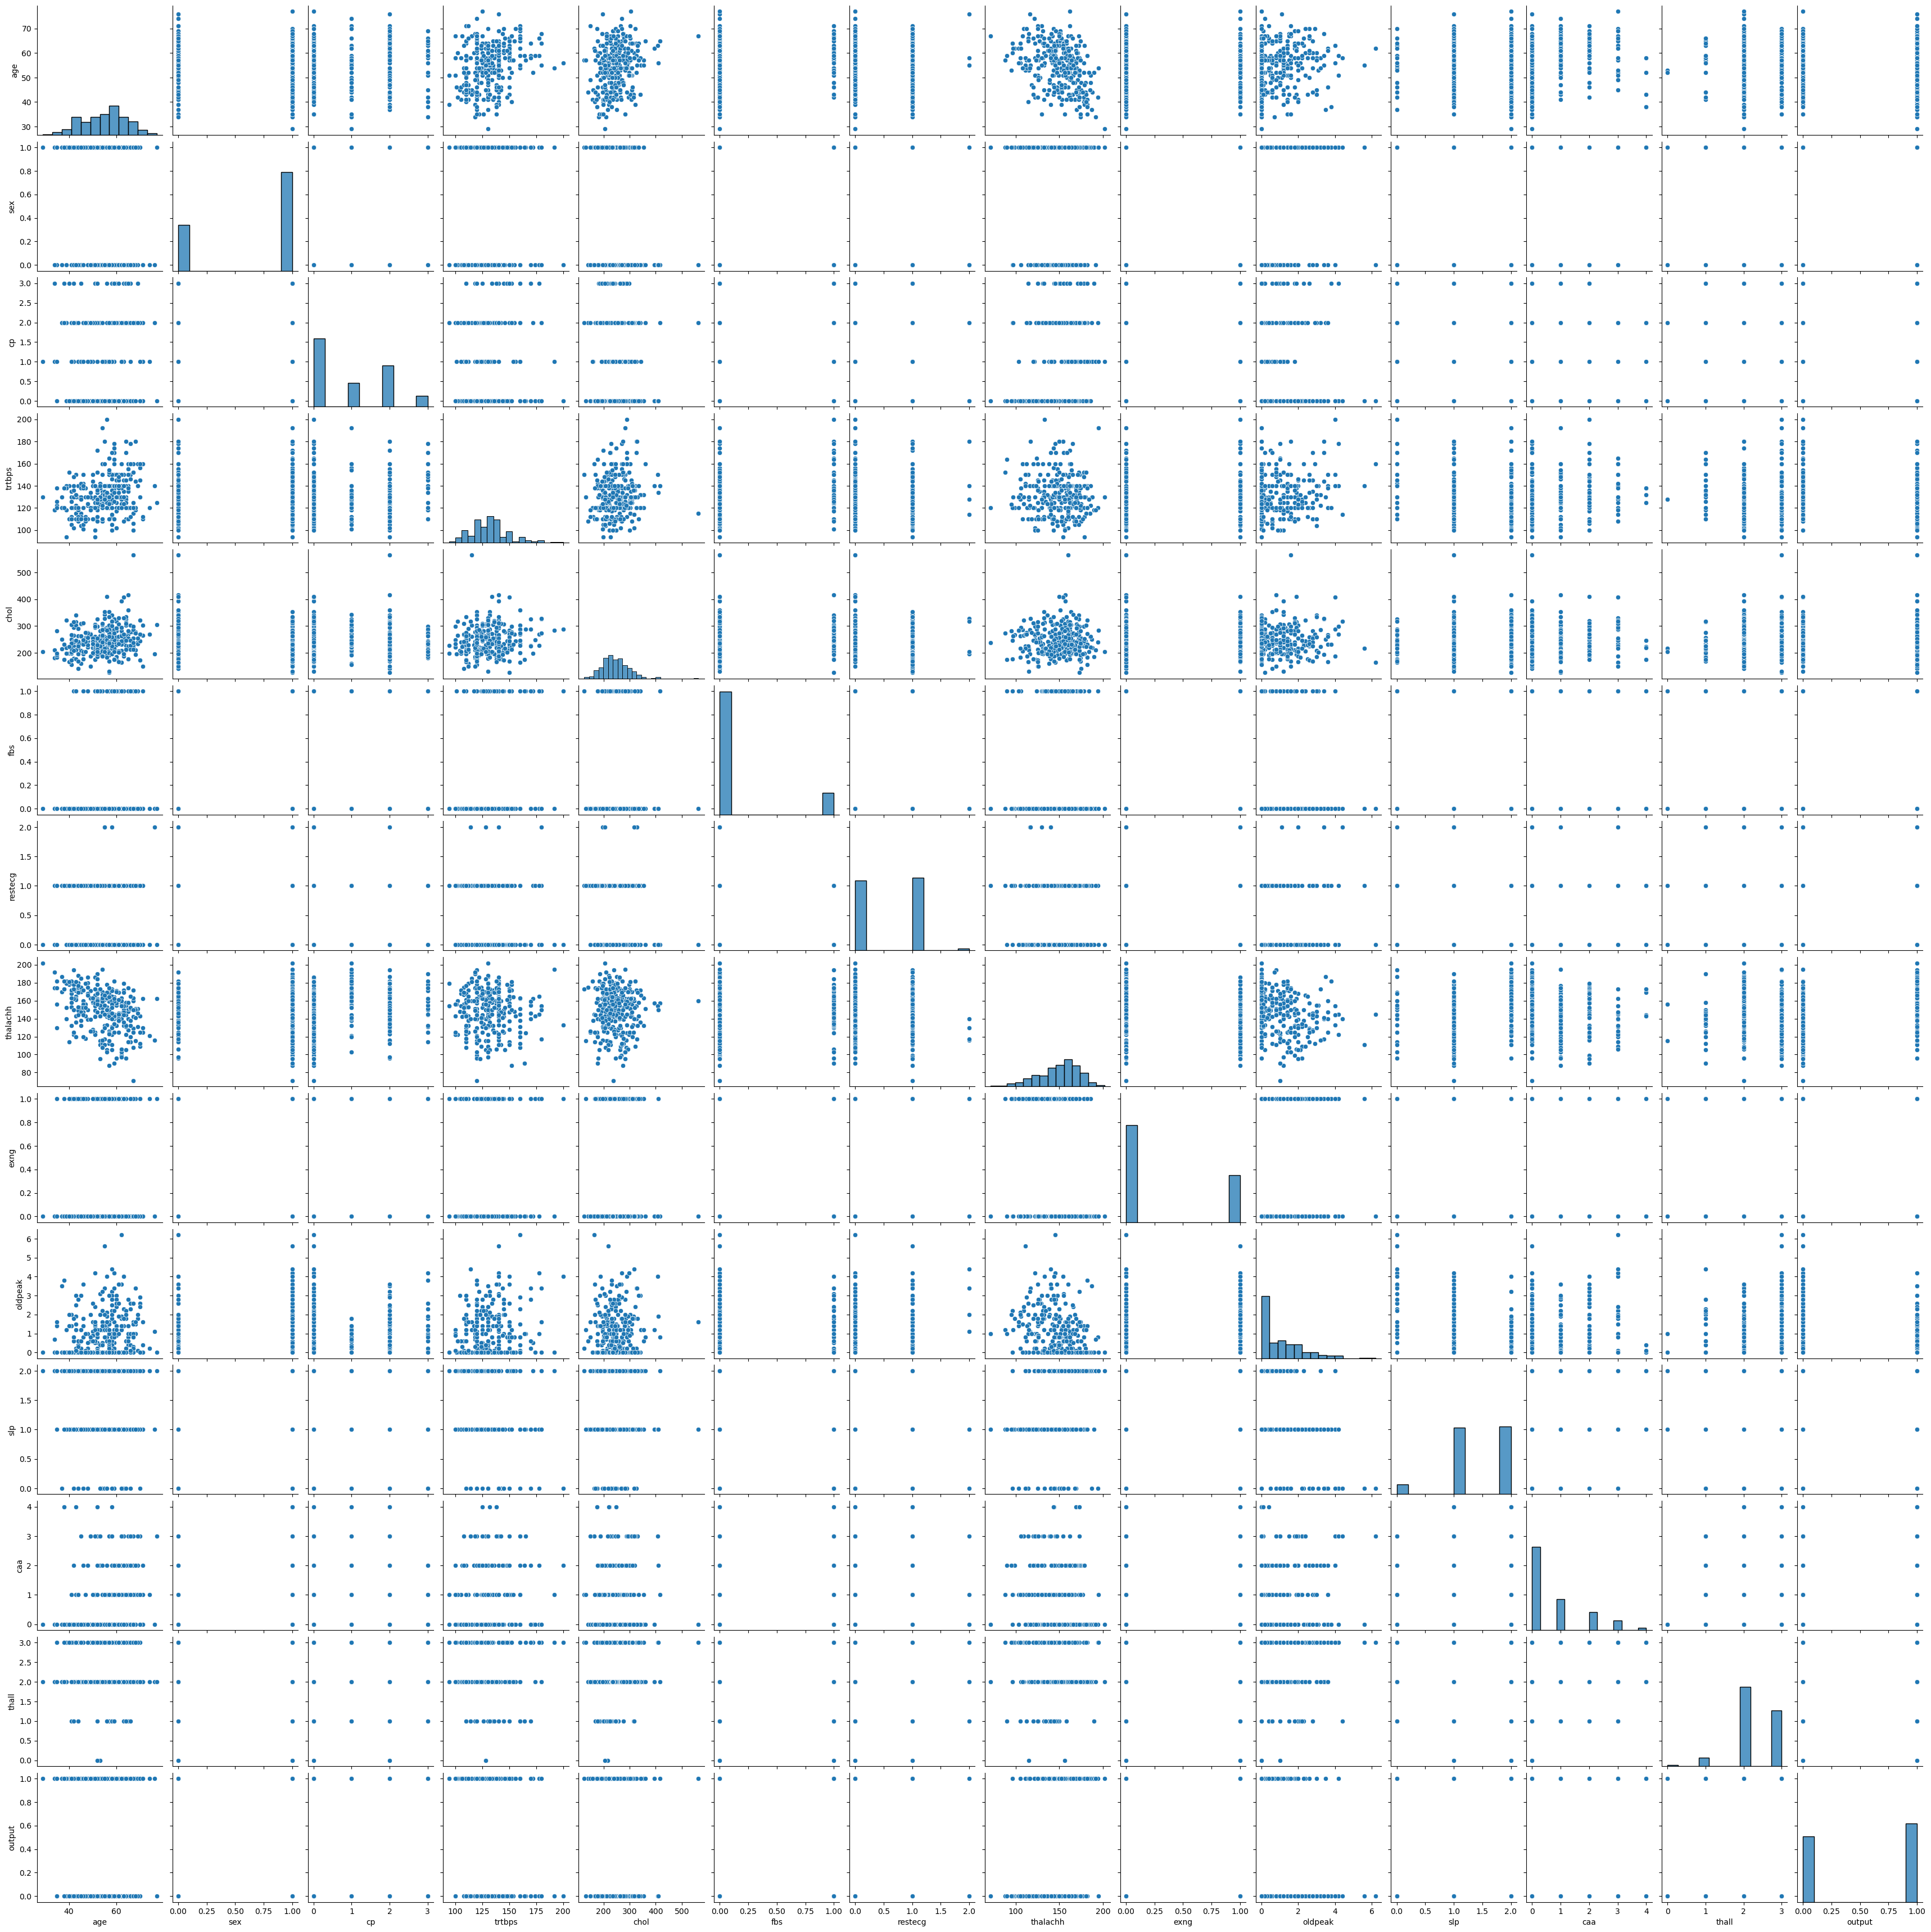

In [93]:
#парные диаграммы
sns.pairplot(df)
plt.show()

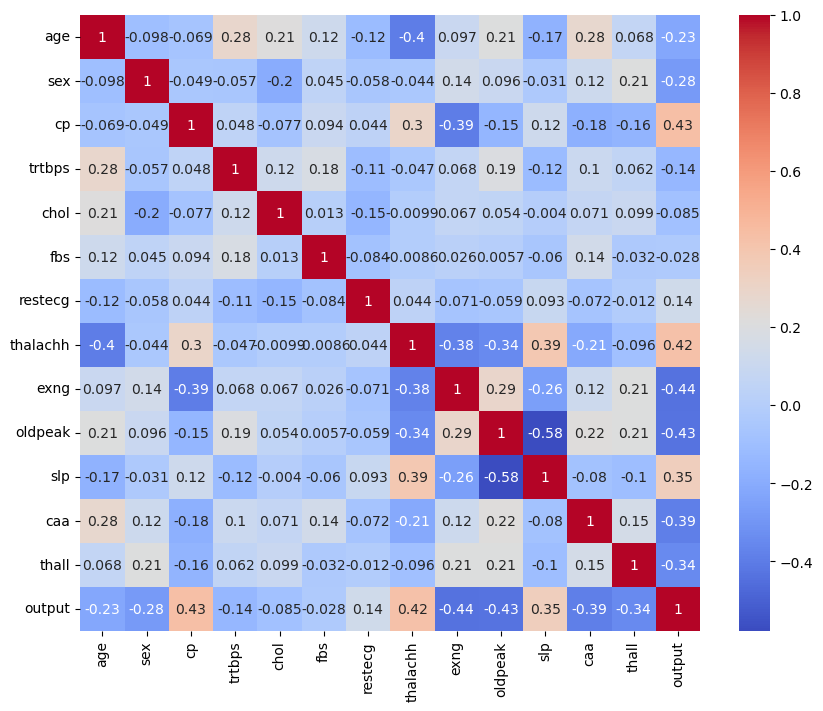

In [94]:
#тепловая карта по матрице корреляции;
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [95]:
to_analyze = df[["output","age", "cp" , "sex"]]
to_analyze.describe()

,output,age,cp,sex
count,303.000000,303.000000,303.000000,303.000000
mean,0.544554,54.366337,0.966997,0.683168
std,0.498835,9.082101,1.032052,0.466011
min,0.000000,29.000000,0.000000,0.000000
25%,0.000000,47.500000,0.000000,0.000000
50%,1.000000,55.000000,1.000000,1.000000
75%,1.000000,61.000000,2.000000,1.000000
max,1.000000,77.000000,3.000000,1.000000


In [96]:
#Судя по средней по грудной боли она относится к типу 1 из 4(0,1,2,3),
#также эти данные относятся больше к мужчинам, так как 0,68 ближе к 1
#Средний возраст на грудные боли = 54

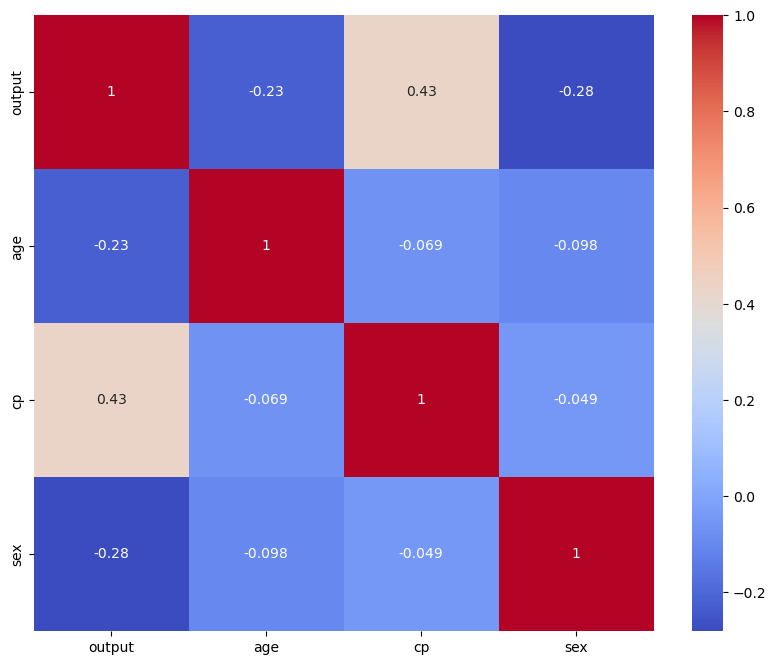

In [97]:
#тепловая карта по матрице корреляции отсортированной;
plt.figure(figsize=(10, 8))
sns.heatmap(to_analyze.corr(), annot=True, cmap='coolwarm')
plt.show()

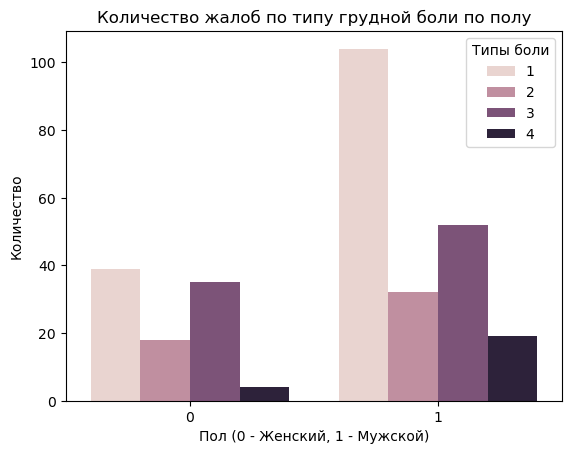

In [98]:
#гистограммы
sns.countplot(x='sex', hue='cp', data=to_analyze)
plt.title('Количество жалоб по типу грудной боли по полу')
plt.xlabel('Пол (0 - Женский, 1 - Мужской)')
plt.ylabel('Количество')
plt.legend(title='Типы боли', loc='upper right', labels=['1', '2','3','4'])
plt.show()

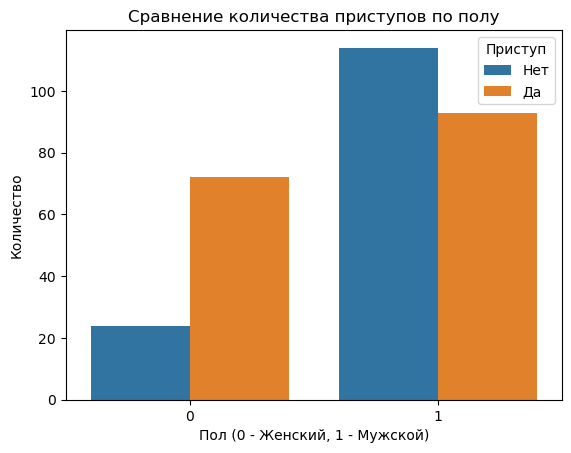

In [100]:
#гистограммы
sns.countplot(x='sex', hue='output', data=to_analyze)
plt.title('Сравнение количества приступов по полу')
plt.xlabel('Пол (0 - Женский, 1 - Мужской)')
plt.ylabel('Количество')
plt.legend(title='Приступ', loc='upper right', labels=['Нет', 'Да'])
plt.show()

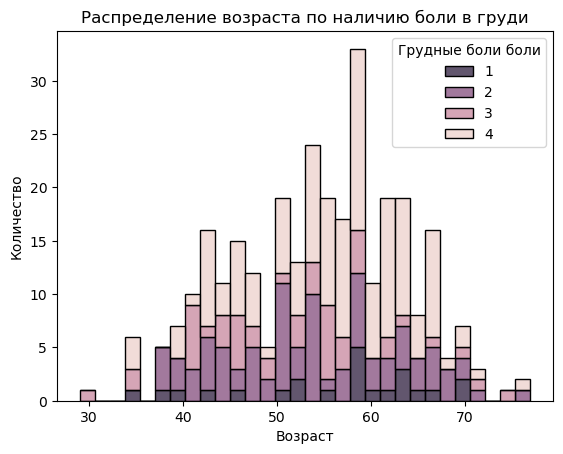

In [132]:
sns.histplot(data=to_analyze, x='age', hue='cp', multiple='stack', bins=30)
plt.title('Распределение возраста по наличию боли в груди')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Грудные боли боли', loc='upper right', labels=['1','2','3','4'])
plt.show()

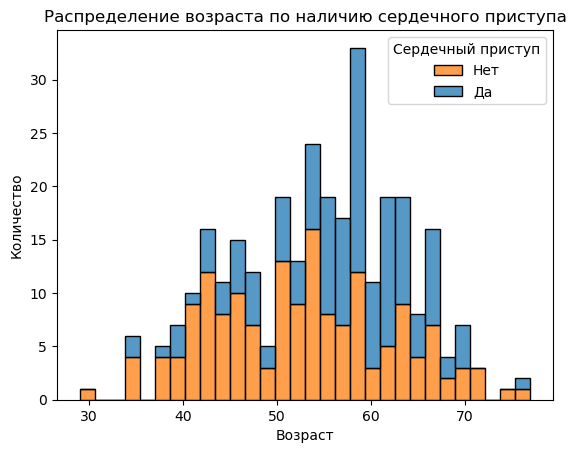

In [108]:
sns.histplot(data=to_analyze, x='age', hue='output', multiple='stack', bins=30)
plt.title('Распределение возраста по наличию сердечного приступа')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend(title='Сердечный приступ', loc='upper right', labels=['Нет', 'Да'])
plt.show()

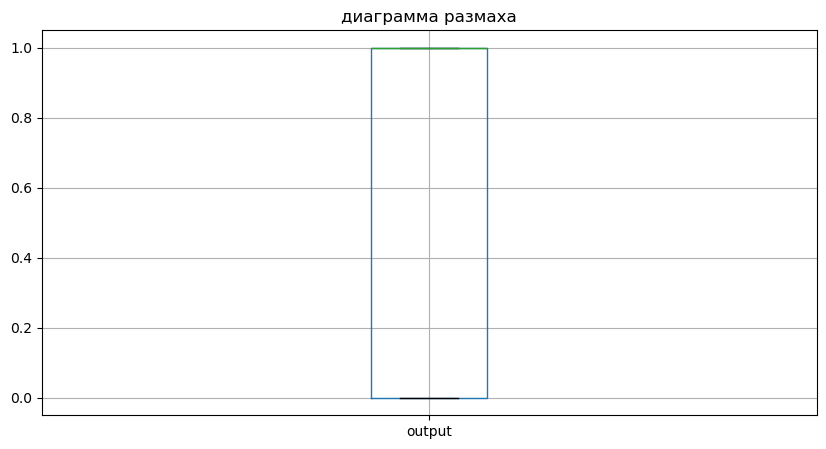

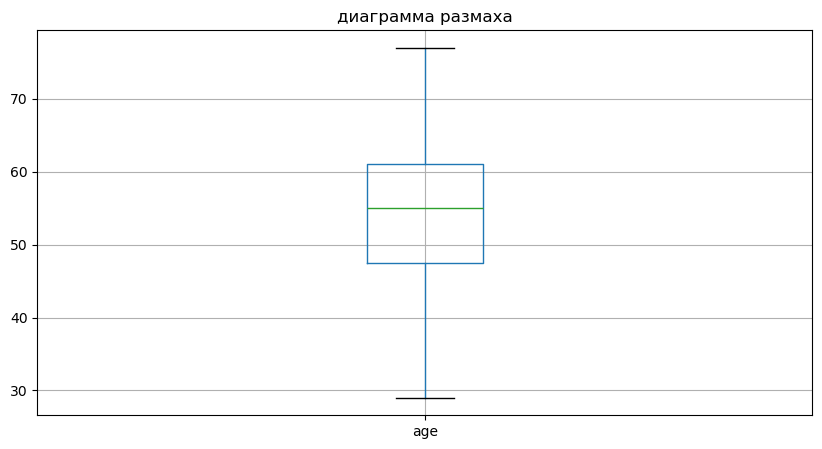

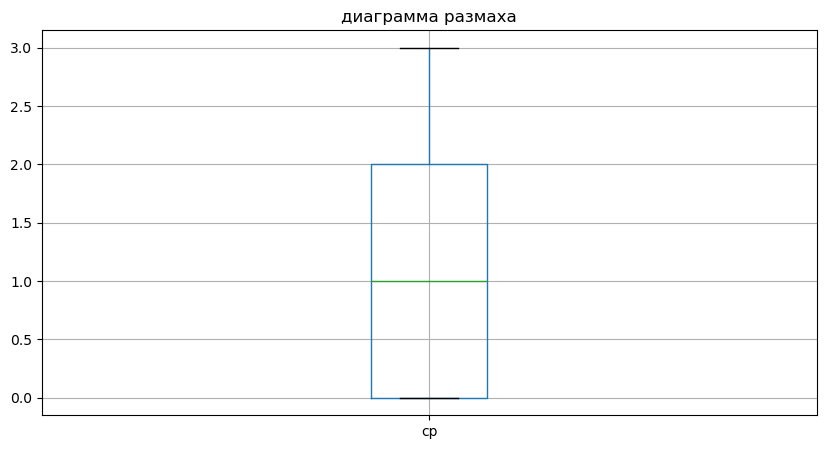

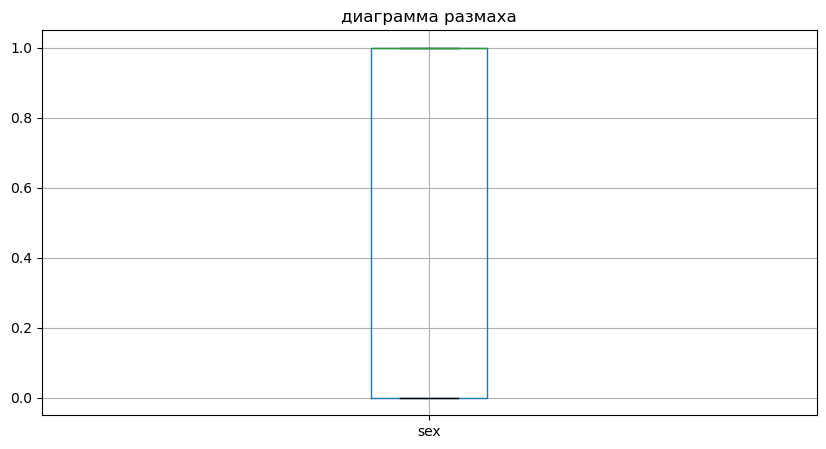

In [133]:
#ящик с усами (диаграмма размаха);
for column in to_analyze:
    plt.figure(figsize=(10, 5))
    to_analyze.boxplot([column])
    plt.title('диаграмма размаха')
plt.show()

C:\Users\Legion\AppData\Local\Temp\ipykernel_2624\2515524416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(to_analyze[column])


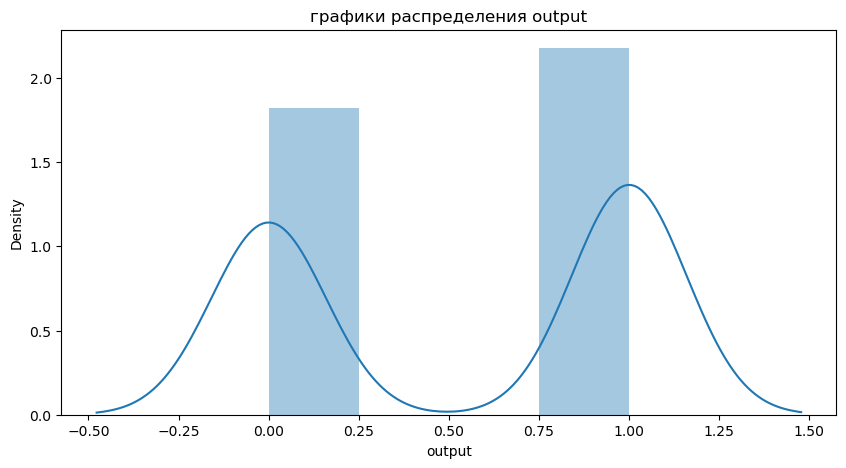

C:\Users\Legion\AppData\Local\Temp\ipykernel_2624\2515524416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(to_analyze[column])


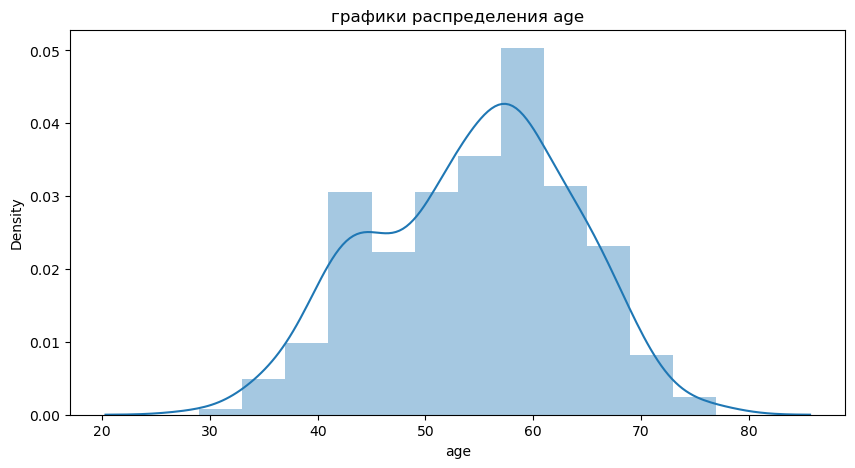

C:\Users\Legion\AppData\Local\Temp\ipykernel_2624\2515524416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(to_analyze[column])


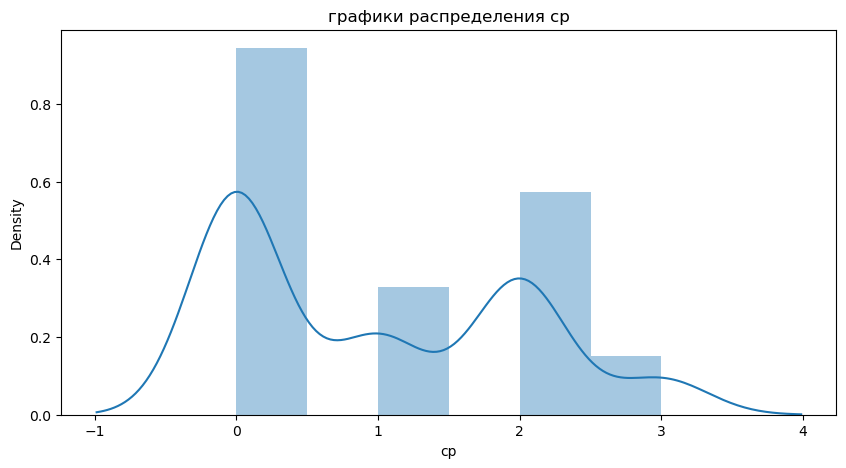

C:\Users\Legion\AppData\Local\Temp\ipykernel_2624\2515524416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(to_analyze[column])


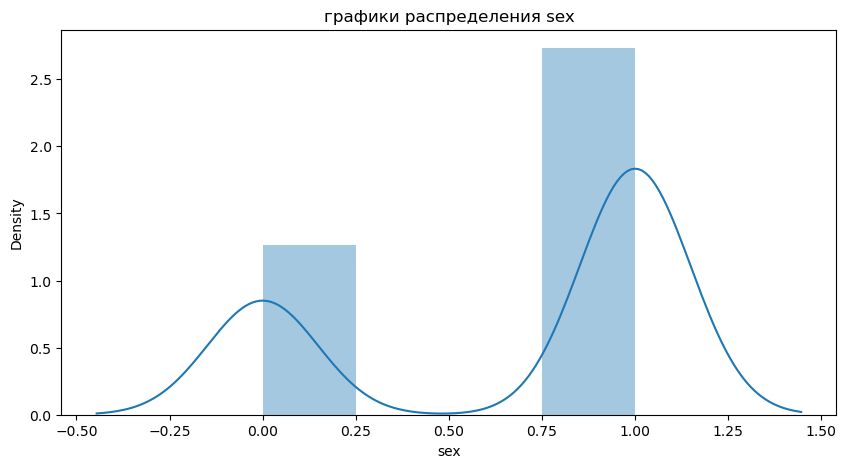

In [134]:
#графики распределения
for column in to_analyze.columns:
    plt.figure(figsize=(10, 5))
    sns.distplot(to_analyze[column])
    plt.title('графики распределения '+str(column))
    plt.show()

In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [11]:
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'])
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_encoded)
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.columns)

In [12]:
X = df_scaled.drop(['output'], axis=1) # Прогноз по всем признакам, кроме 'output'
y = df['output'] # Прогнозируемый признак - наличие сердечного приступа
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.svm import SVC

In [157]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [158]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Оценка точности: {accuracy}")

Оценка точности: 0.8852459016393442


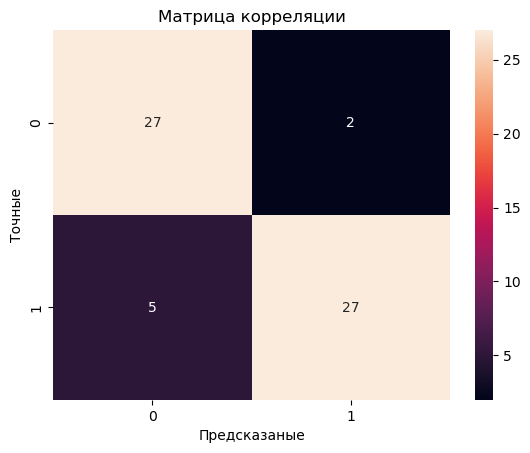

In [159]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Матрица корреляции')
plt.xlabel('Предсказаные')
plt.ylabel('Точные')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

          age  trtbps      chol  thalachh  oldpeak  sex_0  sex_1  cp_0  cp_1  \
132 -0.962963   -0.50  0.866142  0.276923  -0.5000    0.0    0.0   0.0   1.0   
202  0.222222    1.00  0.472441 -1.292308   0.0000    0.0    0.0   1.0   0.0   
196 -0.666667    1.00 -0.141732 -0.184615   1.7500    0.0    0.0   0.0   0.0   
75   0.000000    0.25  0.157480  0.246154   0.3750    1.0   -1.0   0.0   1.0   
176  0.370370   -0.65 -0.157480  0.215385   0.3750    0.0    0.0   1.0   0.0   
..        ...     ...       ...       ...      ...    ...    ...   ...   ...   
188 -0.370370    0.50 -0.110236  0.307692  -0.1250    0.0    0.0   0.0   0.0   
71  -0.296296   -1.80 -0.204724  0.030769  -0.5000    0.0    0.0   0.0   0.0   
106  1.037037    1.50 -0.094488 -0.676923  -0.4375    0.0    0.0   0.0   0.0   
270 -0.666667   -0.50  0.141732 -0.276923   0.0000    0.0    0.0   1.0   0.0   
102  0.592593    0.50 -0.708661  0.800000  -0.5000    1.0   -1.0   0.0   1.0   

     cp_2  ...  slp_2  caa_0  caa_1  ca

In [162]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Оценка точности: {accuracy}")

Оценка точности: 0.8852459016393442


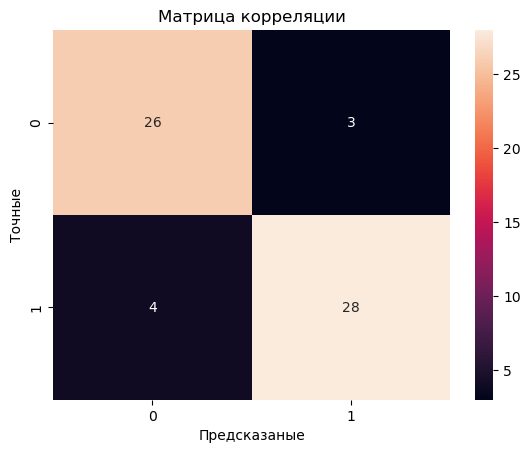

In [163]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Матрица корреляции')
plt.xlabel('Предсказаные')
plt.ylabel('Точные')
plt.show()

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Оценка точности: {accuracy}")

Оценка точности: 0.8032786885245902


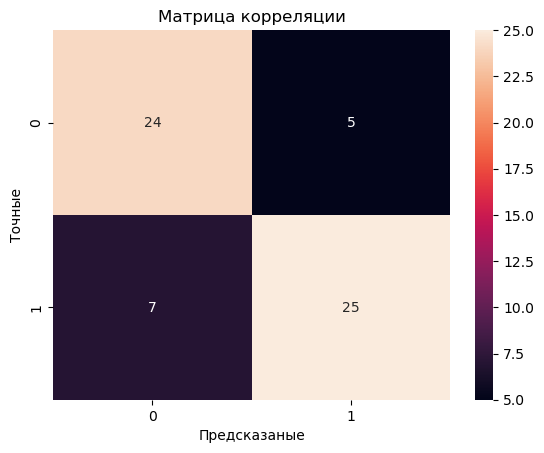

In [168]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Матрица корреляции')
plt.xlabel('Предсказаные')
plt.ylabel('Точные')
plt.show()

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [171]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Оценка точности: {accuracy}")

Оценка точности: 0.8524590163934426


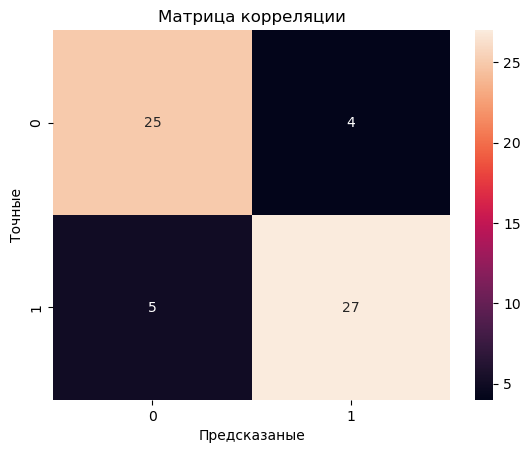

In [173]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.title('Матрица корреляции')
plt.xlabel('Предсказаные')
plt.ylabel('Точные')
plt.show()